# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [3]:
df = pd.read_csv("/content/drive/My Drive/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [14]:
over_log.score(X_test, y_test)

0.9122339787422923

In [15]:
under_log.score(X_test, y_test)

0.9048321696777754

In [16]:
smote_log.score(X_test, y_test)

0.9085150795364572

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_true = y_test

In [19]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75807,  7239],
       [   77,   235]])

In [20]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7532051282051282


In [21]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75190,  7856],
       [   77,   235]])

In [22]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7532051282051282


In [23]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75497,  7549],
       [   77,   235]])

In [24]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7532051282051282


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [25]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [26]:
raw_temp = pd.concat([X_train, y_train], axis =1)

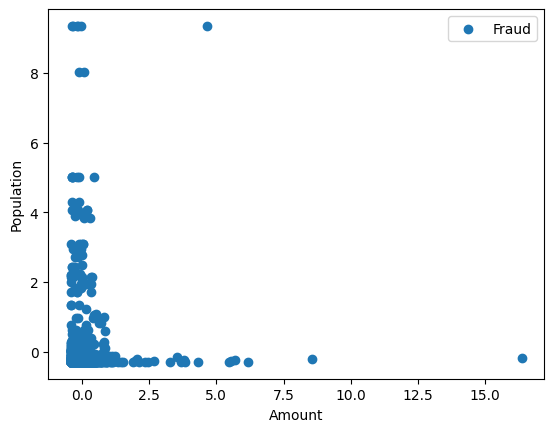

In [27]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [28]:
smote_X = pd.DataFrame(smote_X, columns = X_train.columns)

In [29]:
raw_temp = pd.concat([smote_X, smote_y], axis =1)

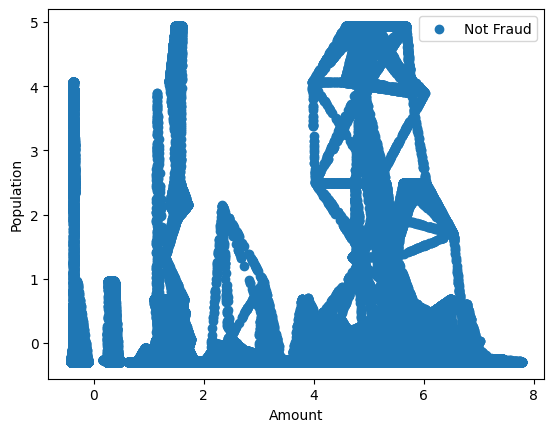

In [30]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [34]:
resampling_methods = {
    'over': RandomOverSampler(),
    'under': RandomUnderSampler(),
    'smote': SMOTE()
}
model_configs = {
    'LOG': LogisticRegression(),
    'LASSO': LogisticRegression(penalty = 'l1',
                                solver = 'liblinear',
                                C = 2.),
    'DTree': DecisionTreeClassifier()
}

In [51]:
def calc_perf_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return (sensitivity, specificity, precision, recall, f1)

In [65]:
trained_models = {}
results = []

In [66]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)

    for model_key, model in model_configs.items():
        combined_key = f'{resample_key}_{model_key}'
        m = model.fit(resample_X, resample_y)

        trained_models[combined_key] = m
        y_pred = m.predict(X_test)
        sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_test, y_pred)
        results.append({'Model': combined_key,
                        'Sensitivity': sensitivity,
                        'Specificity': specificity,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1})

In [67]:
result_df = pd.DataFrame(results)
result_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.753205,0.914349,0.031981,0.753205,0.061358
1,over_LASSO,0.753205,0.914349,0.031981,0.753205,0.061358
2,over_DTree,0.522436,0.998736,0.608209,0.522436,0.562069
3,under_LOG,0.753205,0.890145,0.025112,0.753205,0.048604
4,under_LASSO,0.753205,0.889555,0.024981,0.753205,0.048359
5,under_DTree,0.929487,0.948836,0.063891,0.929487,0.119563
6,smote_LOG,0.753205,0.909303,0.030256,0.753205,0.058176
7,smote_LASSO,0.753205,0.909327,0.030264,0.753205,0.058190
8,smote_DTree,0.676282,0.993498,0.280959,0.676282,0.396990


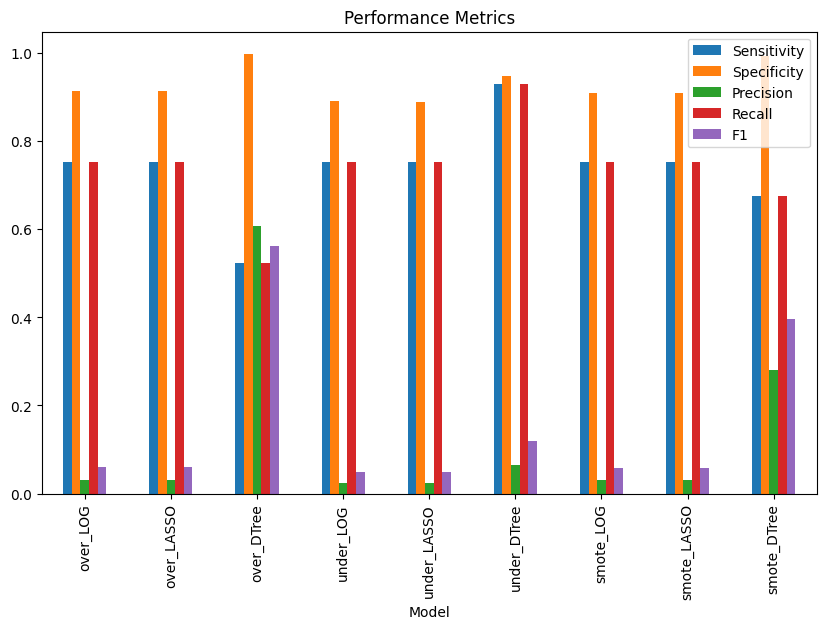

In [68]:
# Plot the metrics
result_df.plot(kind = 'bar', figsize = (10, 6), x = 'Model')
plt.title('Performance Metrics')
plt.show()

There's no single model that outperforms the others in terms of all metrics. The Decision Tree Model presents high specificity and precision and F1 scores but do bad in sensitivity and recall metrics. There's not much difference between oversampling, undersampling and SMOTE Model. However, if we seek balance between the precison and recall scores, we compare F1 scores to find the optimal model. The Decision Tree Models have significantly higher F1 scores compared to others. Here we pick the oversampling Decision Tree Model since it has the highest F1 score. 

In [71]:
# Test the over_DTree model on holdouts

# Generate oversampling dataset
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

# Train the model
over_dt = DecisionTreeClassifier().fit(over_X, over_y)

# Test on the holdouts
y_pred = over_dt.predict(X_holdout)
sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_holdout, y_pred)
results = {'Model': 'over_DTree',
           'Sensitivity': sensitivity,
           'Specificity': specificity,
           'Precision': precision,
           'Recall': recall,
           'F1': f1}
results

{'Model': 'over_DTree',
 'Sensitivity': 0.5317919075144508,
 'Specificity': 0.9984580542572158,
 'Precision': 0.5897435897435898,
 'Recall': 0.5317919075144508,
 'F1': 0.5592705167173252}